# Ramón Armand Laborda Moreu
## Práctica Deep Learning and Computer Vision

La práctica consiste en diseñar, implementar y evaluar una serie de algoritmos predictivos basados en redes neuronales profundas, así como en una combinación de los mismos, para la tarea de predicción del precio de habitaciones en AirBnb.

Dicha tarea puede ser abordada de manera indistinta como una clasificación de rangos de precios (clasificación) o una predicción directa del valor del precio (regresión).

A su vez, la tarea se compone de 4 secciones, cuya finalización completa se exige para superar con éxito el módulo:
1. Modelo 1D/tabular: Emplear al menos 1 red neuronal profunda basada en capas Dense para realizar la predicción a partir de datos tabulares.
2. Modelo 2D/imágenes: Emplear al menos 1 red neuronal profunda basada en capas convolucionales o capas de atención (Transformers) para realizar la predicción a partir de imágenes.
  
  a. Es importante destacar que el alumno debe priorizar el empleo de arquitecturas pre-entrenadas, congelando la parte ya entrenada del modelo y obteniendo embeddings que le permitan afrontar el problema de manera ágil empleando luego un clasificador basado en capas Dense de su elección.
  
  b. Tan sólo en el caso de que el alumno disponga de tiempo, se le anima a que de manera opcional entrene por completo un modelo 2D. Sin embargo, se recomienda completar primero toda la práctica antes de abordar este punto.
3. Estrategia late-fusion: Empleo de 1 modelo DL/ML que sea capaz de combinar las predicciones realizadas por un modelo 1D y por un modelo 2D para realizar a su vez la predicción.
4. Estrategia early-fusion: Empleo de 1 modelo DL/ML que sea capaz de combinar los embeddings obtenidos por un modelo 1D y por un modelo 2D para realizar a su vez la predicción.

## Descarga y preprocesado de los datos

In [ ]:
import cv2
import numpy
import pandas
import imageio.v3 as io

from tqdm import tqdm
from typing import Optional, Union

Con el conocimiento previo de este dataset podemos avanzar con una mayor celeridad. Cargamos el dataset almacenado en mi unidad de Google Drive.

In [ ]:
data = pandas.read_csv("/content/drive/Othercomputers/Mi MacBook Pro/Documents/Keepcoding/IA/Deep Learning/Practica-rlm/dataset.csv", sep = ';')
data = data.dropna(subset=['price'])
data

,id,listing_url,scrape_id,last_scraped,source,picture_url,host_id,host_url,host_name,host_since,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/24670/b2de044...,4804,https://www.airbnb.com/users/show/4804,Frank,2008-12-03,...,4.96,4.88,4.92,NaN,f,1,1,0,0,0.23
1,5506,https://www.airbnb.com/rooms/5506,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/miso/Hosting-...,8229,https://www.airbnb.com/users/show/8229,Terry,2009-02-19,...,4.89,4.55,4.75,STR-490093,f,10,10,0,0,0.68
2,6695,https://www.airbnb.com/rooms/6695,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/38ac4797-e7a4...,8229,https://www.airbnb.com/users/show/8229,Terry,2009-02-19,...,4.95,4.51,4.71,STR-491702,f,10,10,0,0,0.73
3,8789,https://www.airbnb.com/rooms/8789,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/miso/Hosting-...,26988,https://www.airbnb.com/users/show/26988,Anne,2009-07-22,...,4.96,4.96,4.56,NaN,f,9,9,0,0,0.24
4,10813,https://www.airbnb.com/rooms/10813,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/20b5b9c9-e1f4...,38997,https://www.airbnb.com/users/show/38997,Michelle,2009-09-16,...,5.00,5.00,4.80,NaN,f,11,11,0,0,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7194,1046563598019556549,https://www.airbnb.com/rooms/1046563598019556549,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/prohost-api/H...,212359760,https://www.airbnb.com/users/show/212359760,Evonify,2018-08-29,...,5.00,5.00,5.00,Exempt: This listing is a unit that has contra...,f,77,77,0,0,1.00
7195,1046568292864752336,https://www.airbnb.com/rooms/1046568292864752336,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/prohost-api/H...,212359760,https://www.airbnb.com/users/show/212359760,Evonify,2018-08-29,...,NaN,NaN,NaN,Exempt: This listing is a unit that has contra...,f,77,77,0,0,NaN
7196,1047166785349446101,https://www.airbnb.com/rooms/1047166785349446101,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/miso/Hosting-...,233908696,https://www.airbnb.com/users/show/233908696,Together We,2019-01-02,...,NaN,NaN,NaN,STR-531165,t,2,2,0,0,NaN
7197,1047226383263246733,https://www.airbnb.com/rooms/1047226383263246733,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/prohost-api/H...,212359760,https://www.airbnb.com/users/show/212359760,Evonify,2018-08-29,...,NaN,NaN,NaN,Exempt: This listing is a unit that has contra...,f,77,77,0,0,NaN


In [ ]:
data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source',
       'picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'ava

La variable 'price' situada entre 'amenities' y 'minimum_nights' es nuestro objetivo de estudio.
Previo a la separación en train, test y validación, obtenemos los datos que nos servirán para el modelo con imagenes (los datos tabulares ya los tenemos) con ayuda de la siguiente función.

In [ ]:
def download_images(paths: list,
                    canvas: tuple = (224, 224),
                    nb_channels: int = 3,
                    max_imgs: Optional[int] = None
                    ) -> tuple:
  """ Download a list of images from url adresses, converting them to a specific
  canvas size.

  Args:
    paths: Paths or url adresses from which to load images.
    canvas: Desired image width and height.
    nb_channels: Channels in images (1 for B/W, 3 for RGB).
    max_imgs: Upper threshold in the number of images to download.

  Return:
    a tuple of:
      - image values
      - indices within the paths that were successfull.

  """
  n_images = len(paths) if not max_imgs else max_imgs
  images = numpy.zeros((n_images, canvas[0], canvas[1], nb_channels),
                       dtype=numpy.uint8)
  downloaded_idxs = []

  for i_img, url in enumerate(tqdm(paths, total=n_images)):
    if i_img >= n_images:
      break
    try:
        img = io.imread(url)
        img = cv2.resize(img, (canvas[0], canvas[1]))
        downloaded_idxs.append(i_img)
        images[i_img] = img
    except (IOError, ValueError) as e:  # Unavailable url / conversion error
        pass
  return images[downloaded_idxs], downloaded_idxs

En el argumento de la función no indicamos el tamaño con el que se descargarán las fotos por lo que por defecto tendrán un tamaño de 224 x 224 perfecto para redes específicas.
Inmediatamente después, con la segunda sentencia del chunk, normalizamos y convertimos los vectores en el rango [0, 1]

In [ ]:
images, idxs = download_images(data['picture_url'])
images = images.astype("float32") / 255.
images.shape

Filtramos el dataset original por aquellos registros donde la función ha logrado descargar la imagen.

In [ ]:
filtered_data = data.iloc[idxs]
filtered_data

Y guardamos la descarga que ocupa un poco más de 3GB en el repositorio de Drive.

In [ ]:
#numpy.save('/content/drive/Othercomputers/Mi MacBook Pro/Documents/Keepcoding/IA/Deep Learning/Practica-rlm/images.npy', images)
#filtered_data.to_csv('/content/drive/Othercomputers/Mi MacBook Pro/Documents/Keepcoding/IA/Deep Learning/Practica-rlm/filtered_data.csv', sep=';', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ls

In [ ]:
cd 'drive/Othercomputers/Mi MacBook Pro/Documents/Keepcoding/IA/Deep Learning/Practica-rlm'

/content/drive/Othercomputers/Mi MacBook Pro/Documents/Keepcoding/IA/Deep Learning/Practica-rlm


In [ ]:
# Si tenemos que cargar la información al haber dejado la ejecución a medias
filtered_data = pandas.read_csv("filtered_data.csv", sep=';')
images = numpy.load("images.npy")

Como el precio tiene la siguiente estructura '$125.00' convertimos la variable string en numérica guardando la divisa en una columna currency y la transformación float del precio en 'price'.

In [ ]:
filtered_data[['currency', 'price']] = filtered_data['price'].str.extract(r'([€$])?([\d,\.]+)')
filtered_data['price'] = filtered_data['price'].str.replace(',', '').astype(float)

In [ ]:
filtered_data.price.describe()


,price
count,6261.000000
mean,183.872544
std,321.654262
min,20.000000
25%,76.000000
50%,120.000000
75%,200.000000
max,10000.000000


Ahora dividimos nuestros dataset en 3 sub muestras: Train con la que entrenaremos los modelos, val con la que validaremos y test con la que estableceremos el desempeño del modelo.

In [ ]:
from sklearn.model_selection import train_test_split

train_df, temp_df, train_images, temp_images = train_test_split(filtered_data, images, test_size=0.30, random_state=420)

val_df, test_df, val_images, test_images = train_test_split(temp_df, temp_images, test_size=0.5, random_state=420)

print("Datos tabulares - Tamaño de entrenamiento:", len(train_df))
print("Datos tabulares - Tamaño de validación:", len(val_df))
print("Datos tabulares - Tamaño de prueba:", len(test_df))

print("Imágenes - Tamaño de entrenamiento:", len(train_images))
print("Imágenes - Tamaño de validación:", len(val_images))
print("Imágenes - Tamaño de prueba:", len(test_images))

Datos tabulares - Tamaño de entrenamiento: 4382
Datos tabulares - Tamaño de validación: 939
Datos tabulares - Tamaño de prueba: 940
Imágenes - Tamaño de entrenamiento: 4382
Imágenes - Tamaño de validación: 939
Imágenes - Tamaño de prueba: 940


In [ ]:
del temp_df
del temp_images

In [ ]:
train_df.head()

,id,listing_url,scrape_id,last_scraped,source,picture_url,host_id,host_url,host_name,host_since,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,currency
5696,947323957543072435,https://www.airbnb.com/rooms/947323957543072435,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/hosting/Hosti...,89328922,https://www.airbnb.com/users/show/89328922,Ehab,2016-08-11,...,4.50,4.50,STR-455882,f,11,0,11,0,2.41,$
3561,16545081,https://www.airbnb.com/rooms/16545081,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/26fb5f7a-e46f...,18517776,https://www.airbnb.com/users/show/18517776,Huggy,2014-07-21,...,5.00,5.00,NaN,f,31,0,31,0,0.04,$
5612,927751278413604000,https://www.airbnb.com/rooms/927751278413604000,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/cab0cc47-71d0...,37035419,https://www.airbnb.com/users/show/37035419,Wendy,2015-06-29,...,NaN,NaN,NaN,f,9,0,9,0,NaN,$
5741,957865467562485470,https://www.airbnb.com/rooms/957865467562485470,20231218233145,2023-12-18,city scrape,https://a0.muscache.com/pictures/miso/Hosting-...,32870796,https://www.airbnb.com/users/show/32870796,Jessica,2015-05-07,...,NaN,NaN,NaN,t,4,4,0,0,NaN,$
2060,777800715043740407,https://www.airbnb.com/rooms/777800715043740407,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/6422ab45-009d...,69267172,https://www.airbnb.com/users/show/69267172,Lynda,2016-04-27,...,4.79,4.71,STR-513970,f,9,1,7,1,1.74,$


Para comprobar que la división automática se ha hecho de forma correcta y simultanea (numpy nbo tiene ids). Seleccionamos el primer valor del dataframe de train tabular y nos quedamos con su id, despues observamos del fichero de imagenes train el primer elemento y del fichero completo de imagenes el elemento detectado.

In [ ]:
print("Primer id de la muestra de entrenamiento:", train_df['id'].iloc[0]) #2566  o 5696  (está repetido el registro)
print("Detectamos el idx correspondiente:", filtered_data[filtered_data['id']==947323957543072435]['id'])
print("Buscamos la primera imagen del fichero train:", train_images[0])
print("Buscamos la imagen del fichero completo:", images[2566])
print("¿Es la misma foto?:", train_images[0]==images[2566])


Primer id de la muestra de entrenamiento: 947323957543072435
Detectamos el idx correspondiente: 2566    947323957543072435
5696    947323957543072435
Name: id, dtype: int64
Buscamos la primera imagen del fichero train: [[[0.77254903 0.73333335 0.69411767]
  [0.78039217 0.7411765  0.7019608 ]
  [0.76862746 0.72156864 0.6666667 ]
  ...
  [0.77254903 0.69411767 0.5647059 ]
  [0.7921569  0.7137255  0.58431375]
  [0.78039217 0.7019608  0.5647059 ]]

 [[0.79607844 0.75686276 0.7176471 ]
  [0.7647059  0.7254902  0.6862745 ]
  [0.78039217 0.73333335 0.6862745 ]
  ...
  [0.78431374 0.7058824  0.5764706 ]
  [0.7764706  0.7019608  0.57254905]
  [0.7921569  0.7137255  0.58431375]]

 [[0.78039217 0.7411765  0.7058824 ]
  [0.78039217 0.7411765  0.69411767]
  [0.76862746 0.7294118  0.68235296]
  ...
  [0.7764706  0.7019608  0.57254905]
  [0.77254903 0.69803923 0.5686275 ]
  [0.78431374 0.70980394 0.5803922 ]]

 ...

 [[0.8745098  0.6901961  0.36862746]
  [0.8862745  0.7019608  0.38431373]
  [0.941176

Para más adelante fusionar modelos, los datos tabulares y las imágenes tienen que tener una correspondencia. Para la muestra de entrenamiento creamos un array que vaya registrando los elemento depurados para aplicar posteriormente a la muestra de entrenamiento de las imagenes.
Previo a la depuración, asociamos la variable objetivo (Precio) en las tres muestras a cada imagen.

In [ ]:
x_train_img = train_images.copy()
y_train_img = train_df['price'].copy()
print("Imágenes - Tamaño de validación:", len(train_images), len(x_train_img), len(y_train_img))
del train_images

x_val_img = val_images.copy()
y_val_img = val_df['price'].copy()
print("Imágenes - Tamaño de prueba:", len(val_images), len(x_val_img), len(y_val_img))
del val_images

x_test_img = test_images.copy()
y_test_img = test_df['price'].copy()
print("Imágenes - Tamaño de entrenamiento:", len(test_images), len(x_test_img), len(y_test_img))
del test_images

del images



Imágenes - Tamaño de validación: 4382 4382 4382
Imágenes - Tamaño de prueba: 939 939 939
Imágenes - Tamaño de entrenamiento: 940 940 940


Guardo los resultados para cuando diseñemos el modelo de imagenes. El objeto de estudio lo transformo también a numpy.

In [ ]:
"""
numpy.save('/content/drive/Othercomputers/Mi MacBook Pro/Documents/Keepcoding/IA/Deep Learning/Practica-rlm/x_train_img.npy', x_train_img)
numpy.save('/content/drive/Othercomputers/Mi MacBook Pro/Documents/Keepcoding/IA/Deep Learning/Practica-rlm/y_train_img.npy', y_train_img.to_numpy())
del x_train_img
del y_train_img

numpy.save('/content/drive/Othercomputers/Mi MacBook Pro/Documents/Keepcoding/IA/Deep Learning/Practica-rlm/x_val_img.npy', x_val_img)
numpy.save('/content/drive/Othercomputers/Mi MacBook Pro/Documents/Keepcoding/IA/Deep Learning/Practica-rlm/y_val_img.npy', y_val_img.to_numpy())
del x_val_img
del y_val_img

numpy.save('/content/drive/Othercomputers/Mi MacBook Pro/Documents/Keepcoding/IA/Deep Learning/Practica-rlm/x_test_img.npy', x_test_img)
numpy.save('/content/drive/Othercomputers/Mi MacBook Pro/Documents/Keepcoding/IA/Deep Learning/Practica-rlm/y_test_img.npy', y_test_img.to_numpy())
del x_test_img
del y_test_img
"""

In [ ]:
train_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source',
       'picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'ava

In [ ]:
train_df.reset_index(drop=True, inplace=True)
train_df.index

RangeIndex(start=0, stop=4382, step=1)

In [ ]:
import numpy as np
import pandas as pd
#Creamos funcion para explorar variables numéricas
def custom_descibre(df):

    # Solo columnas tipo numericas
    numeric_df = df.select_dtypes(include=[np.number])

    count = numeric_df.count()
    mean = numeric_df.mean()
    std = numeric_df.std()
    min_value = numeric_df.min()
    quantile_25 = numeric_df.quantile(0.25)
    median = numeric_df.median()
    quantile_75 = numeric_df.quantile(0.75)
    max_value = numeric_df.max()
    nulls = numeric_df.isnull().sum()
    correlacion = numeric_df.corrwith(numeric_df.iloc[:, 0])

    stats_df = pd.DataFrame({
        'count': count,
        'mean': mean,
        'std': std,
        'min': min_value,
        '25%': quantile_25,
        '50%': median,
        '75%': quantile_75,
        'max': max_value,
        'nulls': nulls,
        'Corr': correlacion
    })

    return stats_df

In [ ]:
train_df.iloc[0].to_dict()

{'id': 947323957543072435,
 'listing_url': 'https://www.airbnb.com/rooms/947323957543072435',
 'scrape_id': 20231218233145,
 'last_scraped': '2023-12-19',
 'source': 'city scrape',
 'picture_url': 'https://a0.muscache.com/pictures/hosting/Hosting-947323957543072435/original/2d2c5d5a-54fd-48eb-bb91-c1616ba91d7a.jpeg',
 'host_id': 89328922,
 'host_url': 'https://www.airbnb.com/users/show/89328922',
 'host_name': 'Ehab',
 'host_since': '2016-08-11',
 'host_location': 'Boston, MA',
 'host_about': 'Entrepreneur ',
 'host_response_time': 'within an hour',
 'host_response_rate': '100%',
 'host_acceptance_rate': '94%',
 'host_is_superhost': 't',
 'host_thumbnail_url': 'https://a0.muscache.com/im/pictures/user/User-89328922/original/10e23be5-b467-444f-b702-6b5ae884c334.jpeg?aki_policy=profile_small',
 'host_picture_url': 'https://a0.muscache.com/im/pictures/user/User-89328922/original/10e23be5-b467-444f-b702-6b5ae884c334.jpeg?aki_policy=profile_x_medium',
 'host_neighbourhood': 'Dorchester',
 '

In [ ]:
custom_descibre(train_df[['price'] + train_df.drop(columns=['price']).columns.tolist()])

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,count,mean,std,min,25%,50%,75%,max,nulls,Corr
price,4382,1.817430e+02,2.862613e+02,2.000000e+01,7.600000e+01,1.220000e+02,2.000000e+02,9.770000e+03,0,1.000000
id,4382,4.261321e+17,4.383035e+17,3.781000e+03,2.995318e+07,5.374570e+17,8.738025e+17,1.048052e+18,0,0.040885
scrape_id,4382,2.023122e+13,5.977245e-01,2.023122e+13,2.023122e+13,2.023122e+13,2.023122e+13,2.023122e+13,0,NaN
host_id,4382,1.726968e+08,1.611280e+08,4.804000e+03,2.234822e+07,1.306804e+08,2.978601e+08,5.485732e+08,0,0.035267
host_listings_count,4382,5.967526e+01,3.051606e+02,1.000000e+00,2.000000e+00,1.100000e+01,6.500000e+01,4.814000e+03,0,0.086813
host_total_listings_count,4382,1.448640e+02,5.014520e+02,1.000000e+00,4.000000e+00,1.400000e+01,7.600000e+01,6.438000e+03,0,0.022673
neighbourhood_group_cleansed,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4382,NaN
latitude,4382,4.233485e+01,2.828497e-02,4.223530e+01,4.231680e+01,4.234277e+01,4.235422e+01,4.239132e+01,0,0.084006
longitude,4382,-7.108263e+01,3.230106e-02,-7.117344e+01,-7.109889e+01,-7.107629e+01,-7.106145e+01,-7.099600e+01,0,0.066017
accommodates,4382,3.258101e+00,2.380161e+00,1.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01,0,0.323735


Del total de variables numéricas, las variables candidatas a formar parte del modelo son:

In [ ]:
variables_interes = ['price', 'property_type', 'room_type', 'availability_365', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'host_total_listings_count']

In [ ]:
custom_descibre(train_df[variables_interes])

,count,mean,std,min,25%,50%,75%,max,nulls,Corr
price,4382,181.743040,286.261284,20.0,76.0,122.0,200.0,9770.0,0,1.000000
availability_365,4382,198.912597,135.199841,0.0,75.0,221.0,335.0,365.0,0,0.023740
accommodates,4382,3.258101,2.380161,1.0,2.0,2.0,4.0,16.0,0,0.323735
bathrooms,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4382,NaN
bedrooms,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4382,NaN
beds,4315,1.902897,1.599455,1.0,1.0,1.0,2.0,22.0,67,0.317011
minimum_nights,4382,26.500685,34.752234,1.0,1.0,14.0,29.0,400.0,0,-0.052911
maximum_nights,4382,514.254678,412.630177,1.0,180.0,365.0,1125.0,1125.0,0,0.033190
number_of_reviews,4382,50.186901,91.825684,0.0,1.0,10.0,60.0,829.0,0,-0.044980
host_total_listings_count,4382,144.863989,501.451953,1.0,4.0,14.0,76.0,6438.0,0,0.022673


Del bloque de variables de interés, el número de habitaciones y el número de camas aparece totalmente en blanco por lo que dichas variables carecen de información. Las podemos eliminar.

También vamos a eliminar de la muestra de entrenamiento las 67 observaciones que contienen valores nulos en la variable del número de camas.

In [ ]:
variables_interes = ['price', 'property_type', 'room_type', 'availability_365', 'accommodates', 'beds', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'host_total_listings_count']
train_df = train_df[variables_interes]
train_df = train_df.dropna(subset=['beds'])

In [ ]:
custom_descibre(train_df[variables_interes])

,count,mean,std,min,25%,50%,75%,max,nulls,Corr
price,4315,182.581228,288.270170,20.0,76.0,123.0,200.0,9770.0,0,1.000000
availability_365,4315,198.597219,135.204166,0.0,74.0,220.0,335.0,365.0,0,0.025151
accommodates,4315,3.274392,2.391606,1.0,2.0,2.0,4.0,16.0,0,0.322637
beds,4315,1.902897,1.599455,1.0,1.0,1.0,2.0,22.0,0,0.317011
minimum_nights,4315,26.609038,34.831628,1.0,1.0,14.0,29.0,400.0,0,-0.053922
maximum_nights,4315,513.305446,412.253070,1.0,180.0,365.0,1125.0,1125.0,0,0.033344
number_of_reviews,4315,50.428273,92.396264,0.0,1.0,10.0,60.0,829.0,0,-0.045454
host_total_listings_count,4315,145.218772,503.472646,1.0,3.0,14.0,76.0,6438.0,0,0.022407


Ahora procesamos las variables con etiquetas por el método MinMaxScaler para facilitar la regresión al rango [0,1]

Como son variables tipo string, primero hacemos un target encoding por la media. La misma media y scaler es el que se usara para codificar las muestras de validación y test.

In [ ]:
categorical = ['property_type', 'room_type']

mean_map = {}
for c in categorical:
    mean = train_df.groupby(c)['price'].mean()
    train_df[c] = train_df[c].map(mean)
    mean_map[c] = mean

train_df.head()

,price,property_type,room_type,availability_365,accommodates,beds,minimum_nights,maximum_nights,number_of_reviews,host_total_listings_count
0,55.0,75.372152,109.023825,0,1,1.0,1,28,7,16
1,39.0,75.372152,109.023825,365,1,1.0,100,1000,3,34
2,48.0,99.398034,109.023825,328,1,1.0,91,200,0,9
3,100.0,195.231590,219.959753,90,2,1.0,29,365,0,5
4,85.0,75.372152,109.023825,179,2,1.0,1,365,14,23


Como el método MaxMinScaler va a transformar en numpy, es el momento de separar las características y la variable de estudio.

In [ ]:
x_train_tab = train_df.drop(columns=['price'])
y_train_tab = train_df['price']

Para que no interfiera el precio en el escalado, usamos 2 distintos con el mismo método.

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
x_train_tab = scaler_x.fit_transform(x_train_tab)
y_train_tab = scaler_y.fit_transform(y_train_tab.values.reshape(-1, 1))

Aplicamos las mismas transformaciones a validación y test

In [ ]:
# Seleccionamos el mismo numero de caracteristicass
val_df = val_df[variables_interes]
test_df = test_df[variables_interes]

In [ ]:
# Aplicamos a val y test con las medias de train (afecta solo a las 2 variables que antes eran de tipo string)

for c in categorical:
    val_df[c] = val_df[c].map(mean_map[c])
    test_df[c] = test_df[c].map(mean_map[c])

Siguiendo con la linea del fichero de entrenamiento, la variable propensa a tener valores nulos es el número de camas. Por ello vamos a resetear los indices, seliminar las observaciones que tengan valores nulos en las muestras de validación y test y guardar los indices para realizar lo homólogo a las muestras de las imágenes.

Esta regla que afecta directamente al modelo en los datos de entrada, se establecería a la hora de recolectar la información.

In [ ]:
val_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

Eliminamos las 'supuestas' observaciones de las muestras donde la variable del numero de camas es posible que sea un valor nulo. Hablo en condicional porque no hemos visto si se cumple que haya valores nulos.

In [ ]:
val_df = val_df.dropna(subset=['beds'])
test_df = test_df.dropna(subset=['beds'])

Por último para no perder los ides de las tres muestras y replicar en las muestras de imagenes, guardo los ides.

In [ ]:
idx_train = train_df.index
idx_val = val_df.index
idx_test = test_df.index

In [ ]:
#Guardo los idx para luego usarlos en el modelo 2d
numpy.save("idx_train.npy", idx_train.values)
numpy.save("idx_val.npy", idx_val.values)
numpy.save("idx_test.npy", idx_test.values)

Después de realizar las transformaciones y antes de ejecutar el escalado, separamos las características de la variable objetivo.

In [ ]:
x_test_tab = test_df.drop(columns=['price'])
y_test_tab = test_df['price']

x_val_tab = val_df.drop(columns=['price'])
y_val_tab = val_df['price']

In [ ]:
# Aplicamos a val y test el mismo escalado minmax de los datos de entrenamiento
x_val_tab = scaler_x.transform(x_val_tab)
y_val_tab = scaler_y.transform(y_val_tab.values.reshape(-1, 1))

x_test_tab = scaler_x.transform(x_test_tab)
y_test_tab = scaler_y.transform(y_test_tab.values.reshape(-1, 1))

Con las muestras tratadas con los criterios de la muestra de entrenamiento, ya tenemos listos los datos para buscar el modelo 1D. Cuando pasemos al modelo 2D no hay que olvidar eliminar los idx que hemos guardado para que ambos modelos tengan correspondencia.

## Modelado 1D/Tabular

La idea antes de encontrar cuales son los hiperparámetros que mejor se puedan adecuar a nuestro problema es ir jugando con 1 modelo ya pensado. En este caso particular, como es un problema de regresión de datos tabulares, bamos a utilizar keras visto en clase.

Creo que la arquitectura de modelo más adecuada es (Dense) con tofas las neuronas conectadas.

Los parámetros de entrada son fijos y son 9 características (input) que generara nuestra salida (output) de 1 elemento.

Partimos de 3 capas con 64 neuronas, 32 neuronas y 16 neuronas.

Para que esto funciones el modelo será secuencial y con una primera capa de activacion relu para que tome valores mayores o iguales a 0. La última capa de salida tiene una activacion linear para que el precio pueda tomar cualquier valor continuo.

Jugamos con el número de épocas, el batch size y el lr que he acabado dejando en 0.00001 al tener datos ya estandarizados y ver que disminuía el error de aprendizaje.

No he querido poner el bored/patient para que se ejecuten todas las epocas.
También he usado Dropout para apagar de forma aleatoria algunas neuronas.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

inputs = 9
hidden_units = [64, 32, 16]

model = Sequential()
model.add(Dense(hidden_units[0], input_dim=inputs, activation='relu'))

for units in hidden_units[1:]:
    model.add(Dense(units, activation='relu'))
    model.add(Dropout(0.2))

model.add(Dense(1, activation='linear'))

model.compile(optimizer=Adam(learning_rate=0.00001), loss='mse', metrics=['mae'])

model.summary()

history = model.fit(x_train_tab, y_train_tab, epochs=100, batch_size=32, verbose=1,
                    validation_data=(x_val_tab, y_val_tab))

loss, mae = model.evaluate(x_test_tab, y_test_tab, verbose=0)
print(f"Mean Absolute Error en el conjunto de prueba: {mae}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,265 (12.75 KB)

 Trainable params: 3,265 (12.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0209 - mae: 0.1188 - val_loss: 0.0148 - val_mae: 0.1019
Epoch 2/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0144 - mae: 0.0959 - val_loss: 0.0096 - val_mae: 0.0743
Epoch 3/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0099 - mae: 0.0771 - val_loss: 0.0066 - val_mae: 0.0519
Epoch 4/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0074 - mae: 0.0656 - val_loss: 0.0050 - val_mae: 0.0369
Epoch 5/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0060 - mae: 0.0582 - val_loss: 0.0041 - val_mae: 0.0283
Epoch 6/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0053 - mae: 0.0532 - val_loss: 0.0037 - val_mae: 0.0245
Epoch 7/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0045 - mae: 0.0501 - val_loss: 0.0035 - val_mae: 0.0229
Epoch 8/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0039 - mae: 0.0461 - val_loss: 0.0034 - val_mae: 0.0220
Epoch 9/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

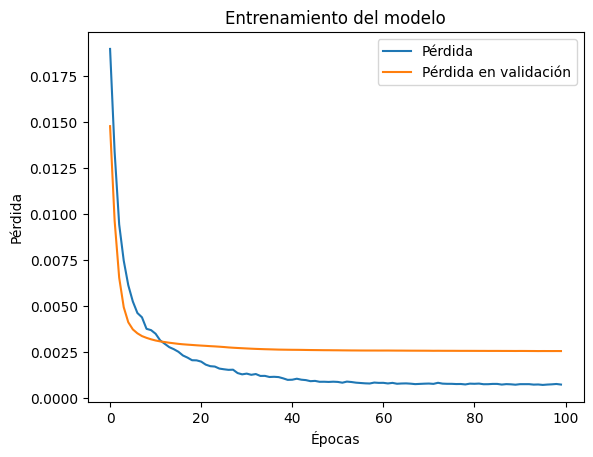

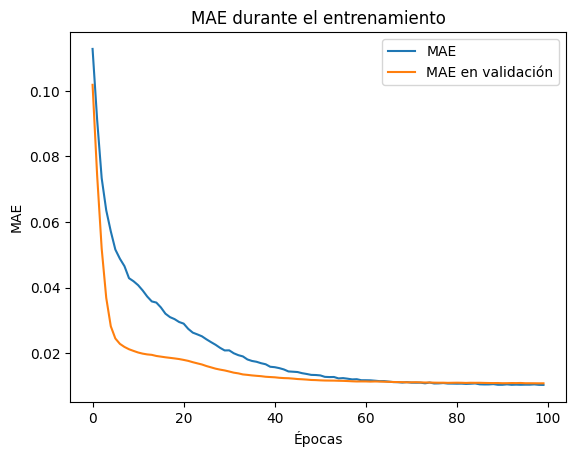

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Pérdida')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.title('Entrenamiento del modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.plot(history.history['mae'], label='MAE')
plt.plot(history.history['val_mae'], label='MAE en validación')
plt.title('MAE durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()
plt.show()

Para evaluar como de bien predice el modelo, realizo la transformación inversa del escarlado aplicado sobre la y y la y estimada

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


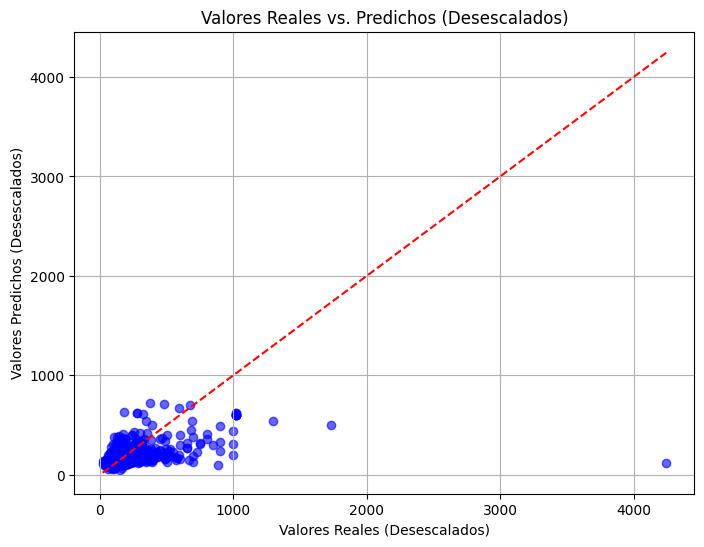

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

y_pred_scaled = model.predict(x_test_tab)

y_pred_rescaled = scaler_y.inverse_transform(y_pred_scaled)

y_test_rescaled = scaler_y.inverse_transform(y_test_tab)

plt.figure(figsize=(8, 6))
plt.scatter(y_test_rescaled, y_pred_rescaled, alpha=0.6, color='b')
plt.plot([min(y_test_rescaled), max(y_test_rescaled)], [min(y_test_rescaled), max(y_test_rescaled)], color='r', linestyle='--')  # Línea de referencia
plt.title('Valores Reales vs. Predichos (Desescalados)')
plt.xlabel('Valores Reales (Desescalados)')
plt.ylabel('Valores Predichos (Desescalados)')
plt.grid(True)
plt.show()

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


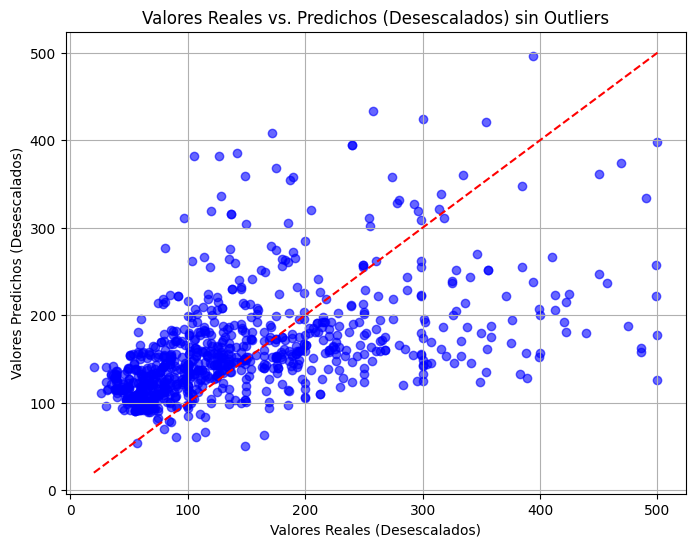

In [ ]:
#Como tengo un valorreal muy elevado, muestro solo el 95% de los valores del percentil
y_pred_scaled = model.predict(x_test_tab)
y_pred_rescaled = scaler_y.inverse_transform(y_pred_scaled)
y_test_rescaled = scaler_y.inverse_transform(y_test_tab)


threshold = np.percentile(y_test_rescaled, 95)

mask = (y_test_rescaled <= threshold) & (y_pred_rescaled <= threshold)

y_test_rescaled_filtered = y_test_rescaled[mask]
y_pred_rescaled_filtered = y_pred_rescaled[mask]

plt.figure(figsize=(8, 6))
plt.scatter(y_test_rescaled_filtered, y_pred_rescaled_filtered, alpha=0.6, color='b')
plt.plot([min(y_test_rescaled_filtered), max(y_test_rescaled_filtered)],
         [min(y_test_rescaled_filtered), max(y_test_rescaled_filtered)],
         color='r', linestyle='--')  # Línea de referencia
plt.title('Valores Reales vs. Predichos (Desescalados) sin Outliers')
plt.xlabel('Valores Reales (Desescalados)')
plt.ylabel('Valores Predichos (Desescalados)')
plt.grid(True)
plt.show()

Parece que el modelo predice los precios por encima de lo que cuesta un airbnb realmente.

Por motivos de tiempo voy a pasar al diseño del modelo 2D y vuelvo más adelante para la búsqueda de los hiperparámetros que mejor se acoplen al modelo diseñado.

In [ ]:
"""
numpy.save('/content/drive/Othercomputers/Mi MacBook Pro/Documents/Keepcoding/IA/Deep Learning/Practica-rlm/x_train_tab.npy', x_train_tab)
numpy.save('/content/drive/Othercomputers/Mi MacBook Pro/Documents/Keepcoding/IA/Deep Learning/Practica-rlm/y_train_tab.npy', y_train_tab)
numpy.save('/content/drive/Othercomputers/Mi MacBook Pro/Documents/Keepcoding/IA/Deep Learning/Practica-rlm/x_val_tab.npy', x_val_tab)
numpy.save('/content/drive/Othercomputers/Mi MacBook Pro/Documents/Keepcoding/IA/Deep Learning/Practica-rlm/y_val_tab.npy', y_val_tab)
numpy.save('/content/drive/Othercomputers/Mi MacBook Pro/Documents/Keepcoding/IA/Deep Learning/Practica-rlm/x_test_tab.npy', x_test_tab)
numpy.save('/content/drive/Othercomputers/Mi MacBook Pro/Documents/Keepcoding/IA/Deep Learning/Practica-rlm/y_test_tab.npy', y_test_tab)
"""

In [ ]:
#model.save('modelo_tabular_1pre.keras')

## Modelado 2D/Imagenes

Los datos se han generado en el apartado de procesamiento de datos por lo que los cargamos directamente desde el drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd 'drive/Othercomputers/Mi MacBook Pro/Documents/Keepcoding/IA/Deep Learning/Practica-rlm'

/content/drive/Othercomputers/Mi MacBook Pro/Documents/Keepcoding/IA/Deep Learning/Practica-rlm


In [76]:
import numpy
x_train_img = numpy.load("x_train_img.npy")
idx_train = numpy.load("idx_train.npy")

In [77]:
y_train_img = numpy.load("y_train_img.npy")

In [ ]:
print("Shape de la muestra de entrenemaiento img:", x_train_img.shape)
print("Shape del id de la muestra de entrenamiento tabular", idx_train.shape)
print("Diferencia", x_train_img.shape[0]-idx_train.shape[0])

Shape de la muestra de entrenemaiento img: (4382, 224, 224, 3)
Shape del id de la muestra de entrenamiento tabular (4315,)
Diferencia 67


La diferencia de 67 corresponde con las 67 observaciones donde la caracteristica numero de camas estaba vacía y eliminamos en la muestra de entrenamiento del modelo 1D. Procedemos a quitar las observaciones correspondientes en la muestra de imágenes.

In [78]:
x_train_img = x_train_img[idx_train]
x_train_img.shape

(4315, 224, 224, 3)

In [79]:
y_train_img = y_train_img[idx_train].reshape(-1, 1)
y_train_img.shape

(4315, 1)

El modelo que mejor se adapta a mi objetivo es sin duda pre entrenado que pueda utilizar la estructura de las imagenes 224x224x3. Por el momento y para no implantar código en pytorch voy a usar un modelo convolucional en vez de un transformer.

Para posteriormente hacer una fusión con el modelo 1D, en esta ocasión del modelo 2D vamos a emplear un problema de clasificación con ResNet escogido antes que VGG por su robustez, y eficiencia.

Lo primero es clasificar los precios en 3 categorías.

In [ ]:
y_train_img

array([[ 55.],
       [ 39.],
       [ 48.],
       ...,
       [115.],
       [249.],
       [ 88.]])

In [ ]:
import numpy as np
def categorizar_precio(precio, muestra):
    pct = np.percentile(muestra, [0, 33, 66, 100])
    if precio <= pct[1]:
        return 0
    elif precio <= pct[2]:
        return 1
    else:
        return 2

In [81]:
y_train_img_cat = np.array([categorizar_precio(p, y_train_img) for p in y_train_img])

In [82]:
"""
np.save("x_train_img_clean.npy", x_train_img)
np.save("y_train_img_cat_clean.npy", y_train_img_cat)
"""

Ahora preparamos los ficheros de validación y test de la misma forma que hemos hecho el de entrenamiento.

In [83]:
x_val_img = numpy.load("x_val_img.npy")
idx_val = numpy.load("idx_val.npy")
y_val_img = numpy.load("y_val_img.npy")
print("Shape de la muestra de entrenemaiento img:", x_val_img.shape)
print("Shape del id de la muestra de entrenamiento tabular", idx_val.shape)
print("Diferencia", x_val_img.shape[0]-idx_val.shape[0])
x_val_img = x_val_img[idx_val]
y_val_img = y_val_img[idx_val].reshape(-1, 1)
print(y_val_img.shape, x_val_img.shape)
y_val_img_cat = np.array([categorizar_precio(p, y_train_img) for p in y_val_img])

Shape de la muestra de entrenemaiento img: (939, 224, 224, 3)
Shape del id de la muestra de entrenamiento tabular (930,)
Diferencia 9
(930, 1) (930, 224, 224, 3)


In [84]:
"""
np.save("x_val_img_clean.npy", x_val_img)
np.save("y_val_img_cat_clean.npy", y_val_img_cat)
"""

In [85]:
x_test_img = numpy.load("x_test_img.npy")
idx_test = numpy.load("idx_test.npy")
y_test_img = numpy.load("y_test_img.npy")
print("Shape de la muestra de entrenemaiento img:", x_test_img.shape)
print("Shape del id de la muestra de entrenamiento tabular", idx_test.shape)
print("Diferencia", x_test_img.shape[0]-idx_test.shape[0])
x_test_img = x_test_img[idx_test]
y_test_img = y_test_img[idx_test].reshape(-1, 1)
print(y_test_img.shape, x_test_img.shape)
y_test_img_cat = np.array([categorizar_precio(p, y_train_img) for p in y_test_img])

Shape de la muestra de entrenemaiento img: (940, 224, 224, 3)
Shape del id de la muestra de entrenamiento tabular (926,)
Diferencia 14
(926, 1) (926, 224, 224, 3)


In [86]:
"""
np.save("x_test_img_clean.npy", x_test_img)
np.save("y_test_img_cat_clean.npy", y_test_img_cat)
"""

Usaremos el modelo preentrenado y establecemos 3 clases con activación softmax.

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

y_train_img_cat = tf.keras.utils.to_categorical(y_train_img_cat, num_classes=3)
y_val_img_cat = tf.keras.utils.to_categorical(y_val_img_cat, num_classes=3)
y_test_img_cat = tf.keras.utils.to_categorical(y_test_img_cat, num_classes=3)

# Carga la arquitectura ResNet50 preentrenada sin las capas superiores
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Congelar las capas del modelo base para evitar que se reentrenen
base_model.trainable = False

# Añadir capas adicionales
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Reduce las dimensiones espaciales
x = Dropout(0.5)(x)

predictions = Dense(3, activation='softmax')(x)

# Crear el modelo completo
model = Model(inputs=base_model.input, outputs=predictions)

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
epochs = 10
batch_size = 32


Observamos como es el modelo descargado e inmediatamente después la capa clasificadora diseñada.

In [ ]:
print(base_model.summary())

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

None


In [ ]:
print(model.summary())

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,593,859 (90.00 MB)

 Trainable params: 6,147 (24.01 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

None


In [ ]:
model.fit(x_train_img, y_train_img_cat)

135/135 ━━━━━━━━━━━━━━━━━━━━ 32s 124ms/step - accuracy: 0.3248 - loss: 1.2815


In [ ]:
history = model.fit(
    x_train_img, y_train_img_cat,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_val_img, y_val_img_cat)
)

Epoch 1/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 41s 194ms/step - accuracy: 0.3430 - loss: 1.1983 - val_accuracy: 0.4269 - val_loss: 1.0805
Epoch 2/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 14s 104ms/step - accuracy: 0.3699 - loss: 1.1125 - val_accuracy: 0.4086 - val_loss: 1.0801
Epoch 3/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 23s 124ms/step - accuracy: 0.3957 - loss: 1.0915 - val_accuracy: 0.4516 - val_loss: 1.0685
Epoch 4/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 18s 106ms/step - accuracy: 0.3895 - loss: 1.0829 - val_accuracy: 0.4355 - val_loss: 1.0649
Epoch 5/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 21s 110ms/step - accuracy: 0.4041 - loss: 1.0876 - val_accuracy: 0.3720 - val_loss: 1.0967
Epoch 6/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 20s 106ms/step - accuracy: 0.3955 - loss: 1.0865 - val_accuracy: 0.4548 - val_loss: 1.0625
Epoch 7/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 14s 106ms/step - accuracy: 0.4288 - loss: 1.0664 - val_accuracy: 0.4602 - val_loss: 1.0610
Epoch 8/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 20s 105ms/step - accuracy: 0.4199 - loss: 1

In [ ]:
model.save('modelo_resnet_3cat.keras')

In [ ]:
eval_result = model.evaluate(x_test_img, y_test_img_cat)
print(f"Validation Loss: {eval_result[0]}, Validation Accuracy: {eval_result[1]}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 12s 212ms/step - accuracy: 0.3617 - loss: 1.2247
Validation Loss: 1.2395751476287842, Validation Accuracy: 0.3466522693634033


Tras la ejecución repetida y búsqueda de hiperparámetros adecuados, el modelo con 3 salidas de clasificación no acaba de tener un buen desempeño. Reducimos el núumero para obtener un modelo mejor.

In [80]:
import numpy as np
def categorizar_precio(precio, muestra):
    pct = np.percentile(muestra, [50])
    if precio <= pct[0]:
        return '0'
    else:
        return '1'

In [ ]:
y_train_img_cat = tf.keras.utils.to_categorical(y_train_img_cat, num_classes=2)
y_val_img_cat = tf.keras.utils.to_categorical(y_val_img_cat, num_classes=2)

In [ ]:
y_test_img_cat = tf.keras.utils.to_categorical(y_test_img_cat, num_classes=2)

Bajamos también la tasa de aprendizaje para que vaya más lenta. También cambiamos la función de perdidas ya que es clasificación binaria.

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.optimizers import Adam

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))

base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)

# 2 caracteristicas
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

optimizer = Adam(learning_rate=0.00001)  # Menor tasa de aprendizaje

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 10
batch_size = 32


In [ ]:
print(base_model.summary())

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

None


In [ ]:
print(model.summary())

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,591,810 (90.00 MB)

 Trainable params: 4,098 (16.01 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

None


Entrenamos el modelo.

In [ ]:
history = model.fit(
    x_train_img, y_train_img_cat,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_val_img, y_val_img_cat)
)

Epoch 1/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 44s 221ms/step - accuracy: 0.5255 - loss: 0.7175 - val_accuracy: 0.4817 - val_loss: 0.6970
Epoch 2/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 18s 101ms/step - accuracy: 0.5019 - loss: 0.7231 - val_accuracy: 0.5570 - val_loss: 0.6907
Epoch 3/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 20s 101ms/step - accuracy: 0.4988 - loss: 0.7187 - val_accuracy: 0.5656 - val_loss: 0.6896
Epoch 4/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 21s 102ms/step - accuracy: 0.5073 - loss: 0.7173 - val_accuracy: 0.5634 - val_loss: 0.6900
Epoch 5/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 21s 104ms/step - accuracy: 0.5128 - loss: 0.7167 - val_accuracy: 0.5710 - val_loss: 0.6895
Epoch 6/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 14s 105ms/step - accuracy: 0.5206 - loss: 0.7127 - val_accuracy: 0.5624 - val_loss: 0.6890
Epoch 7/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 14s 105ms/step - accuracy: 0.4996 - loss: 0.7242 - val_accuracy: 0.5699 - val_loss: 0.6891
Epoch 8/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 20s 104ms/step - accuracy: 0.5031 - loss: 0

Guardamos para las posteriores ejecuciones de late y early fusion.

In [ ]:
model.save('modelo_resnet_2cat.keras')

In [ ]:
eval_result = model.evaluate(x_test_img, y_test_img_cat)
print(f"Validation Loss: {eval_result[0]}, Validation Accuracy: {eval_result[1]}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 235ms/step - accuracy: 0.6172 - loss: 0.6820
Validation Loss: 0.6822205781936646, Validation Accuracy: 0.6079913377761841


El modelo ahora tiene un mejor desempeño (Accuracy del 61%). Si son 2 categorías ya es más fiable que tire una moneda al aire. Vamos a pasar a comparar las prediciones del test con los datos reales del test.

In [ ]:
# Realiza las predicciones en el conjunto de test
predictions = model.predict(x_test_img)

# Convierte las predicciones a etiquetas (índices de clases)
y_pred = np.argmax(predictions, axis=1)

29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 179ms/step


In [ ]:
print(predictions)

[[0.48613685 0.5138632 ]
 [0.510762   0.489238  ]
 [0.50565004 0.49435   ]
 ...
 [0.4885406  0.51145947]
 [0.4371758  0.5628242 ]
 [0.47748893 0.52251107]]


In [ ]:
y_pred

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,

In [ ]:
y_test_img_cat

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [ ]:
y_test_img

array([[ 114.],
       [ 307.],
       [ 250.],
       [ 213.],
       [  58.],
       [  49.],
       [ 127.],
       [ 247.],
       [ 102.],
       [  56.],
       [ 186.],
       [ 154.],
       [ 490.],
       [ 142.],
       [ 399.],
       [  88.],
       [ 326.],
       [  70.],
       [ 183.],
       [ 107.],
       [  50.],
       [ 175.],
       [  65.],
       [  86.],
       [ 112.],
       [ 180.],
       [  39.],
       [ 100.],
       [ 163.],
       [  65.],
       [ 112.],
       [  74.],
       [  61.],
       [  38.],
       [ 100.],
       [ 439.],
       [  77.],
       [ 120.],
       [ 343.],
       [ 134.],
       [  80.],
       [ 450.],
       [  35.],
       [ 216.],
       [ 108.],
       [ 125.],
       [  65.],
       [ 183.],
       [ 136.],
       [ 180.],
       [  82.],
       [  60.],
       [  75.],
       [ 199.],
       [ 600.],
       [  81.],
       [ 113.],
       [ 101.],
       [  58.],
       [ 995.],
       [ 186.],
       [ 199.],
       [

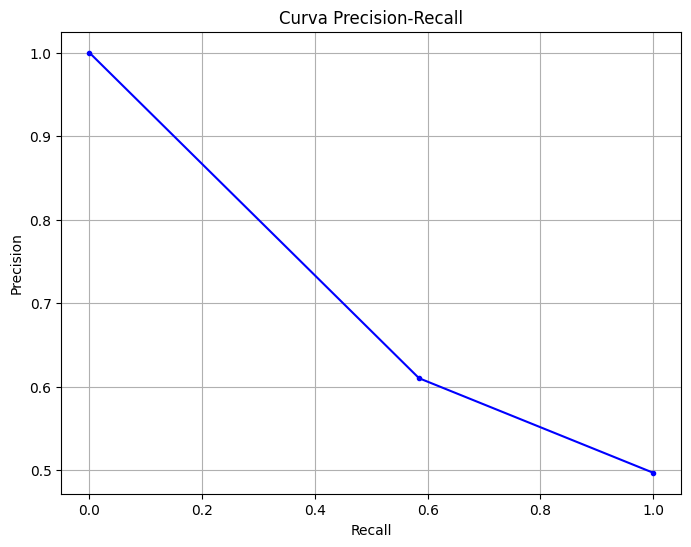

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Obtener las probabilidades predichas y las etiquetas reales
y_pred_prob = np.argmax(predictions, axis=1)  # Probabilidades para la clase positiva
y_true = np.argmax(y_test_img_cat, axis=1)

# Calcular precisión, recall y los umbrales
precision, recall, thresholds = precision_recall_curve(y_true, y_pred_prob)

# Graficar la curva de precisión-recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', color='b')
plt.title('Curva Precision-Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

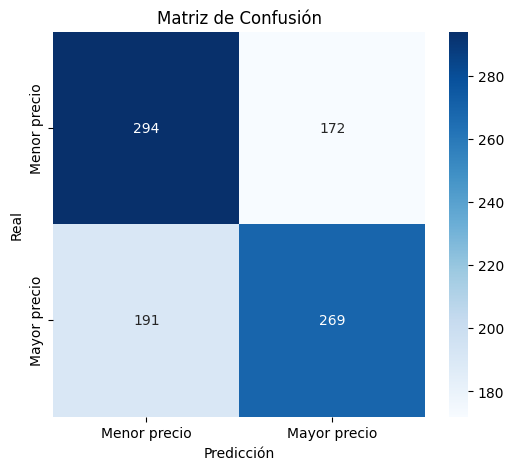

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = np.argmax(predictions, axis=1) > 0.5  # clasificacion binaria
y_true = np.argmax(y_test_img_cat, axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Menor precio', 'Mayor precio'], yticklabels=['Menor precio', 'Mayor precio'])
plt.title('Matriz de Confusión')
plt.xlabel('Prediccion')
plt.ylabel('Real')
plt.show()

Como vemos en el gráfico superior, hay error de tipo 1 y de tipo 2 pero en menor ocurrencia que los aciertos.

Como he indicado en la leyenda del gráfico, las dos categorías hacen referencia a si el precio según la imagen es mayor o menor (que la mediana calculada en la categorización del precio).

Guardamos el modelo para los siguientes apartados.

In [ ]:
"""
numpy.save('/content/drive/Othercomputers/Mi MacBook Pro/Documents/Keepcoding/IA/Deep Learning/Practica-rlm/x_test_img_clean.npy', x_test_img)
numpy.save('/content/drive/Othercomputers/Mi MacBook Pro/Documents/Keepcoding/IA/Deep Learning/Practica-rlm/y_test_img_cat_clean.npy', y_test_img_cat)
"""

## Estrategia late-fusion

La estrategia en este punto es combinar los outputs del modelo tabular con el modelo de imagenes (2 categorias) e incluir nuevas neuronas que fusionen el problema de regresión (shape 1) y el problema de clasificación (shape 2) para obtener un nuevo precio (problema de regresión).

La idea es tener una predicción del precio de la vivienda de un airbnb basado en las caracteristicas oficiales de la web (información tabular) y fusionar con un modelo de reconocimiento de imágenes (basado en resnet) que nos indica simplemente si el precio es mayor o menor en base a la imagen.

In [1]:
from google.colab import drive
import tensorflow as tf
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd 'drive/Othercomputers/Mi MacBook Pro/Documents/Keepcoding/IA/Deep Learning/Practica-rlm'

/content/drive/Othercomputers/Mi MacBook Pro/Documents/Keepcoding/IA/Deep Learning/Practica-rlm


Cargamos ambos modelos guardados con anterioridad en Google Drive.

In [3]:
from tensorflow.keras.models import load_model

modelo_1d = load_model('modelo_tabular_1pre.keras')
modelo_2d = load_model('modelo_resnet_2cat.keras')

In [5]:
print(modelo_1d.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,797 (38.27 KB)

 Trainable params: 3,265 (12.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,532 (25.52 KB)

None


In [ ]:
print(modelo_2d.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,600,008 (90.03 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,591,810 (90.00 MB)

 Optimizer params: 8,198 (32.03 KB)

None


Vemos que ambos modelos tienen un input y un output independiente. Aunque las muestras se corresponden. La fila 1 con información tabular corresponde con la imagen 1 que usan ambos modelos.

Cargamos la información train, val y test de ambos modelos.

In [4]:
import numpy
x_train_tab = numpy.load("x_train_tab.npy")
y_train_tab = numpy.load("y_train_tab.npy")
x_val_tab = numpy.load("x_val_tab.npy")
y_val_tab = numpy.load("y_val_tab.npy")
x_test_tab = numpy.load("x_test_tab.npy")
y_test_tab = numpy.load("y_test_tab.npy")

In [5]:
x_train_img = numpy.load("x_train_img_clean.npy")
y_train_img = numpy.load("y_train_img_cat_clean.npy")
y_train_img_cat = tf.keras.utils.to_categorical(y_train_img, num_classes=2)

In [6]:
x_val_img = numpy.load("x_val_img_clean.npy")
y_val_img = numpy.load("y_val_img_cat_clean.npy")
y_val_img_cat = tf.keras.utils.to_categorical(y_val_img, num_classes=2)

In [22]:
x_test_img = numpy.load("x_test_img_clean.npy")
y_test_img = numpy.load("y_test_img_cat_clean.npy")

Establecemos que los modelos ya están preentrenados y no queremos que entrenen (la última fase es la que se entrenará con train, val y evaluará con test)

In [7]:
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

modelo_1d.trainable = False
modelo_2d.trainable = False

Indicamos el formato obligatorio de datos input que beben los modelos.

In [8]:
input_tab = Input(shape=(x_train_tab.shape[1],))
input_img = Input(shape=(x_train_img.shape[1], x_train_img.shape[2], x_train_img.shape[3]))

In [8]:
print(input_tab)
print(input_img)

<KerasTensor shape=(None, 9), dtype=float32, sparse=False, name=keras_tensor_391>
<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, name=keras_tensor_392>


In [9]:
output_reg = modelo_1d(input_tab)
output_class = modelo_2d(input_img)

Vemos el output 1 de regresion y el output 2 del modelo de clasificación

In [10]:
print(output_reg)
print(output_class)

<KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_393>
<KerasTensor shape=(None, 2), dtype=float32, sparse=False, name=keras_tensor_394>


Concatenamos generando un nuevo tensor de shape = 3

In [10]:
merged = Concatenate()([output_reg, output_class])

In [12]:
print(merged)

<KerasTensor shape=(None, 3), dtype=float32, sparse=False, name=keras_tensor_395>


Se incluye 1 capa oculta con 32 neuronas para que entrene y sea algo más complejo para terminar en un problema de regresión de 1 neurona.

In [11]:
hidden = Dense(32, activation='relu')(merged)

final_output = Dense(1, activation='linear')(hidden)

In [14]:
print(final_output)

<KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_397>


In [12]:
fusion_model = Model(inputs=[input_tab, input_img], outputs=final_output)

In [29]:
print(fusion_model.summary())

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer (InputLayer)  │ (None, 9)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ functional (Functional)   │ (None, 2)              │     23,591,810 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential (Sequential)   │ (None, 1)              │          3,265 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda (Lambda)           │ (None, 1)              │              0 │ functional[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 2)              │              0 │ sequential[0][0],      │
│                           │                        │                │ lambda[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 32)             │             96 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 1)              │             33 │ dense[0][0]            │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 23,595,204 (90.01 MB)

 Trainable params: 129 (516.00 B)

 Non-trainable params: 23,595,075 (90.01 MB)

None


Compilamos el modelo probando sobre el notebook distintos lr. Con 0.0001 se han encontrado los mejores resultados aunque tampoco son para tirar cohetes.

In [13]:
fusion_model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['mae'])

In [31]:
fusion_model.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer (InputLayer)  │ (None, 9)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ functional (Functional)   │ (None, 2)              │     23,591,810 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential (Sequential)   │ (None, 1)              │          3,265 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda (Lambda)           │ (None, 1)              │              0 │ functional[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 2)              │              0 │ sequential[0][0],      │
│                           │                        │                │ lambda[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 32)             │             96 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 1)              │             33 │ dense[0][0]            │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 23,595,204 (90.01 MB)

 Trainable params: 129 (516.00 B)

 Non-trainable params: 23,595,075 (90.01 MB)

Sin cambiar la versión de keras a keras-nightly el codigo me daba error

In [14]:
!pip install keras-nightly
import keras
from keras.layers import Dense

In [15]:
history = fusion_model.fit(
    x=[x_train_tab, x_train_img],
    y=y_train_tab,
    epochs=10,
    batch_size=32,
    validation_data=([x_val_tab, x_val_img], y_val_tab)
)

Epoch 1/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 1036s 8s/step - loss: 0.0294 - mae: 0.1623 - val_loss: 0.0105 - val_mae: 0.0931
Epoch 2/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 1015s 8s/step - loss: 0.0081 - mae: 0.0740 - val_loss: 0.0036 - val_mae: 0.0374
Epoch 3/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 1053s 8s/step - loss: 0.0030 - mae: 0.0436 - val_loss: 0.0028 - val_mae: 0.0227
Epoch 4/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 1034s 8s/step - loss: 0.0026 - mae: 0.0336 - val_loss: 0.0027 - val_mae: 0.0180
Epoch 5/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 1008s 7s/step - loss: 0.0013 - mae: 0.0248 - val_loss: 0.0027 - val_mae: 0.0160
Epoch 6/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 1044s 8s/step - loss: 9.1709e-04 - mae: 0.0191 - val_loss: 0.0027 - val_mae: 0.0159
Epoch 7/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 1012s 7s/step - loss: 8.3419e-04 - mae: 0.0159 - val_loss: 0.0027 - val_mae: 0.0148
Epoch 8/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 1006s 7s/step - loss: 8.6587e-04 - mae: 0.0142 - val_loss: 0.0027 - val_mae: 0.0155
Epoch 9/10
135/135 ━━━━━━━━━

In [16]:
"""
fusion_model.save('late_fusion.keras')
"""

In [17]:
fusion_model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 9)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential (Sequential)   │ (None, 1)              │          3,265 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ functional (Functional)   │ (None, 2)              │     23,591,810 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 3)              │              0 │ sequential[0][0],      │
│                           │                        │                │ functional[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 32)             │            128 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 1)              │             33 │ dense[0][0]            │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 23,595,560 (90.01 MB)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 23,595,075 (90.01 MB)

 Optimizer params: 324 (1.27 KB)

Mostramos las predicciones del modelo sin la escala inversa.

In [21]:
y_pred = fusion_model.predict([x_test_tab, x_test_img])

29/29 ━━━━━━━━━━━━━━━━━━━━ 190s 6s/step


In [22]:
y_pred

array([[0.01856249],
       [0.0191399 ],
       [0.01920155],
       [0.01750793],
       [0.01840495],
       [0.01861423],
       [0.01856213],
       [0.01769064],
       [0.0188314 ],
       [0.01725983],
       [0.01883527],
       [0.01829824],
       [0.01967552],
       [0.01822547],
       [0.01942429],
       [0.01874997],
       [0.01945057],
       [0.019235  ],
       [0.0183092 ],
       [0.01878539],
       [0.01874899],
       [0.01891105],
       [0.01876001],
       [0.0181605 ],
       [0.01530714],
       [0.01847587],
       [0.01893239],
       [0.0183971 ],
       [0.01893233],
       [0.01897776],
       [0.0175162 ],
       [0.01719782],
       [0.01841548],
       [0.0192382 ],
       [0.01871538],
       [0.0179947 ],
       [0.01744595],
       [0.01957538],
       [0.02017362],
       [0.01918462],
       [0.01732255],
       [0.01888948],
       [0.01927298],
       [0.01852823],
       [0.01818368],
       [0.01836106],
       [0.01860182],
       [0.018

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test_tab, y_pred)
mse = mean_squared_error(y_test_tab, y_pred)
rmse = numpy.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 0.012875145097508405
MSE: 0.0005166800820648784
RMSE: 0.02273059792581089


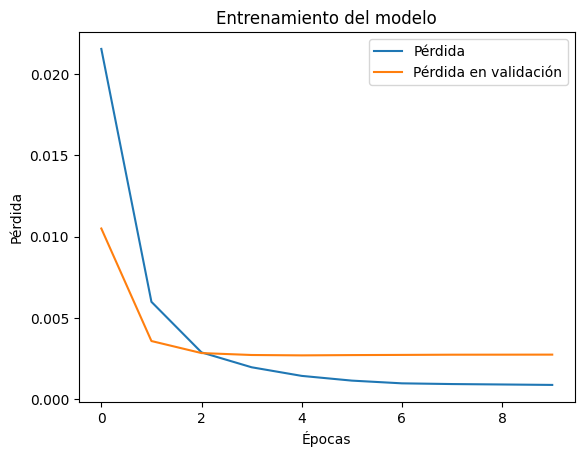

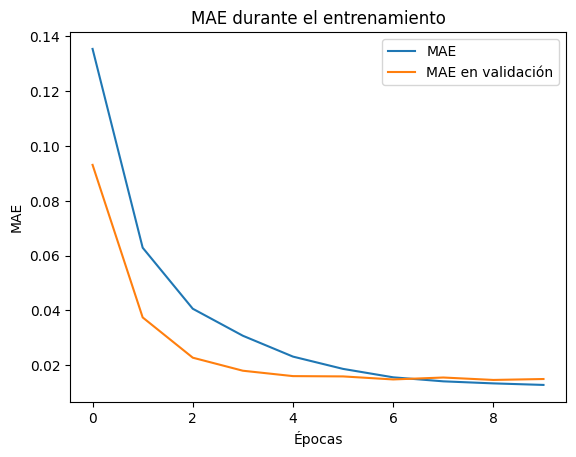

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Pérdida')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.title('Entrenamiento del modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.plot(history.history['mae'], label='MAE')
plt.plot(history.history['val_mae'], label='MAE en validación')
plt.title('MAE durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [38]:
"""
import pandas
filtered_data = pandas.read_csv("filtered_data.csv", sep=';')
filtered_data[['currency', 'price']] = filtered_data['price'].str.extract(r'([€$])?([\d,\.]+)')
filtered_data['price'] = filtered_data['price'].str.replace(',', '').astype(float)

from sklearn.model_selection import train_test_split

train_df, temp_df = train_test_split(filtered_data, test_size=0.30, random_state=420)

val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=420)

print("Datos tabulares - Tamaño de entrenamiento:", len(train_df))
print("Datos tabulares - Tamaño de validación:", len(val_df))
print("Datos tabulares - Tamaño de prueba:", len(test_df))
train_df.reset_index(drop=True, inplace=True)
train_df.index
variables_interes = ['price', 'property_type', 'room_type', 'availability_365', 'accommodates', 'beds', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'host_total_listings_count']
train_df = train_df[variables_interes]
train_df = train_df.dropna(subset=['beds'])
y_train_tab = train_df['price']

from sklearn.preprocessing import MinMaxScaler

scaler_y = MinMaxScaler()

y_train_tab = scaler_y.fit_transform(y_train_tab.values.reshape(-1, 1))
"""


Datos tabulares - Tamaño de entrenamiento: 4382
Datos tabulares - Tamaño de validación: 939
Datos tabulares - Tamaño de prueba: 940


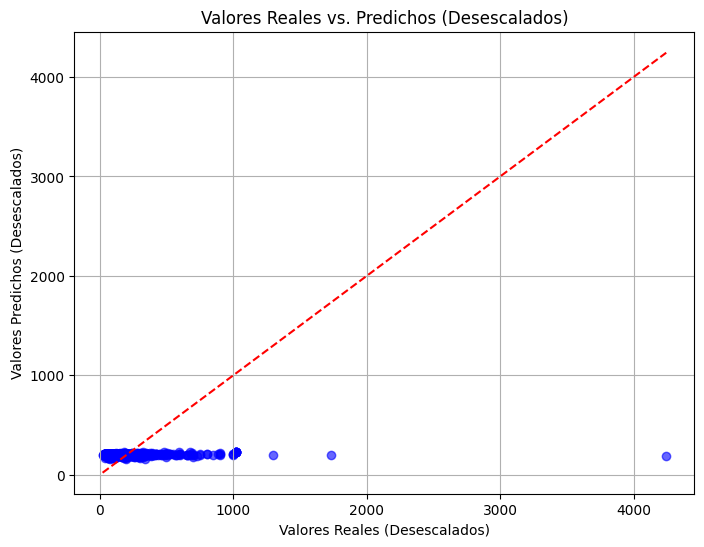

In [39]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

y_pred_scaled = y_pred
y_pred_rescaled = scaler_y.inverse_transform(y_pred_scaled)
y_test_rescaled = scaler_y.inverse_transform(y_test_tab)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_rescaled, y_pred_rescaled, alpha=0.6, color='b')
plt.plot([min(y_test_rescaled), max(y_test_rescaled)], [min(y_test_rescaled), max(y_test_rescaled)], color='r', linestyle='--')  # Línea de referencia
plt.title('Valores Reales vs. Predichos (Desescalados)')
plt.xlabel('Valores Reales (Desescalados)')
plt.ylabel('Valores Predichos (Desescalados)')
plt.grid(True)
plt.show()

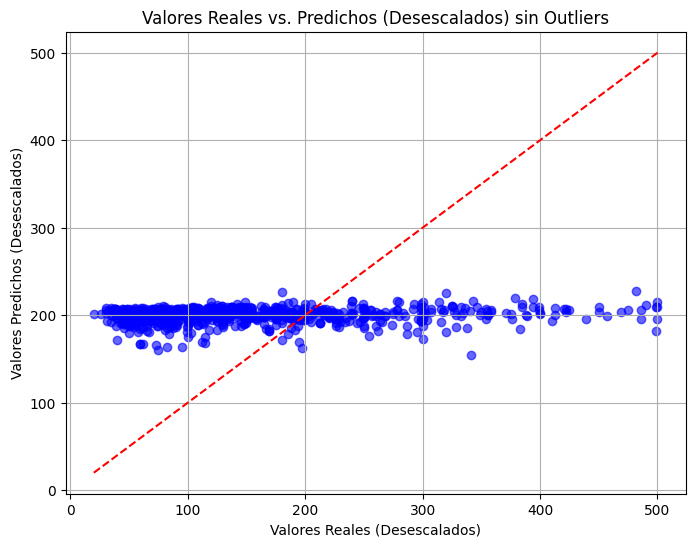

In [40]:
threshold = numpy.percentile(y_test_rescaled, 95)

mask = (y_test_rescaled <= threshold) & (y_pred_rescaled <= threshold)

y_test_rescaled_filtered = y_test_rescaled[mask]
y_pred_rescaled_filtered = y_pred_rescaled[mask]

plt.figure(figsize=(8, 6))
plt.scatter(y_test_rescaled_filtered, y_pred_rescaled_filtered, alpha=0.6, color='b')
plt.plot([min(y_test_rescaled_filtered), max(y_test_rescaled_filtered)],
         [min(y_test_rescaled_filtered), max(y_test_rescaled_filtered)],
         color='r', linestyle='--')  # Línea de referencia
plt.title('Valores Reales vs. Predichos (Desescalados) sin Outliers')
plt.xlabel('Valores Reales (Desescalados)')
plt.ylabel('Valores Predichos (Desescalados)')
plt.grid(True)
plt.show()

El modelo no ha sido capaz de combinar de forma adecuada ambos inputs de los modelos. Seguro que con mayor tiempo soy capaz de sesgar uno de los dos para obtener mejores resultados. Al final solo los precios entre 190 y 210 son los que se predicen bien.
El problema observado es la dominancia de alguna rama o incluso una mala configuración de las capas densas.

Veamos como desempeña con una Early Fusion.

## Estrategia Early Fusion

Seguimos usando los 2 modelos entrenados en la primera parte de la práctica. En esta ocasión en vez de usar como input los output finales de estos modelos, nos vamos a quedar con el paso previo a la regresión en el caso tabular y al paso precio en la clasificación para el modelo de imagenes.

Cargamos ambos modelos y los ficheros de entrenamiento, validación y test.

In [1]:
from google.colab import drive
import tensorflow as tf
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd 'drive/Othercomputers/Mi MacBook Pro/Documents/Keepcoding/IA/Deep Learning/Practica-rlm'

/content/drive/Othercomputers/Mi MacBook Pro/Documents/Keepcoding/IA/Deep Learning/Practica-rlm


In [13]:
from tensorflow.keras.models import load_model

modelo_1d = load_model('modelo_tabular_1pre.keras')
modelo_2d = load_model('modelo_resnet_2cat.keras')

In [4]:
import numpy
x_train_tab = numpy.load("x_train_tab.npy")
y_train_tab = numpy.load("y_train_tab.npy")
x_val_tab = numpy.load("x_val_tab.npy")
y_val_tab = numpy.load("y_val_tab.npy")
x_test_tab = numpy.load("x_test_tab.npy")
y_test_tab = numpy.load("y_test_tab.npy")

In [5]:
x_train_img = numpy.load("x_train_img_clean.npy")
y_train_img = numpy.load("y_train_img_cat_clean.npy")
y_train_img_cat = tf.keras.utils.to_categorical(y_train_img, num_classes=2)

In [6]:
x_val_img = numpy.load("x_val_img_clean.npy")
y_val_img = numpy.load("y_val_img_cat_clean.npy")
y_val_img_cat = tf.keras.utils.to_categorical(y_val_img, num_classes=2)

In [42]:
x_test_img = numpy.load("x_test_img_clean.npy")
y_test_img = numpy.load("y_test_img_cat_clean.npy")
y_test_img_cat = tf.keras.utils.to_categorical(y_test_img, num_classes=2)

Congelamos las capas para no entrenarlas y definimos los input.

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate

modelo_1d.trainable = False
modelo_2d.trainable = False

input_tab = Input(shape=(x_train_tab.shape[1],))
input_img = Input(shape=(x_train_img.shape[1], x_train_img.shape[2], x_train_img.shape[3]))


In [110]:
print(input_tab)
print(input_img)

<KerasTensor shape=(None, 9), dtype=float32, sparse=False, name=keras_tensor_1987>
<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, name=keras_tensor_1988>


Vemos que la salida final (como en el caso del late-fusion) tiene forma 1 para la regresión y 2 para la clasificación.

In [29]:
output_1d = modelo_1d.outputs
output_2d = modelo_2d.outputs

In [113]:
print(output_1d)
print(output_2d)

[<KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_1616>]
[<KerasTensor shape=(None, 2), dtype=float32, sparse=False, name=keras_tensor_1986>]


In [114]:
modelo_1d.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,797 (38.27 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 3,265 (12.75 KB)

 Optimizer params: 6,532 (25.52 KB)

In [115]:
modelo_2d.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,600,008 (90.03 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,591,810 (90.00 MB)

 Optimizer params: 8,198 (32.03 KB)

Truncamos el modelo quedandonos con la capa previa a la regresión que tiene nombre dense_2

In [15]:
modelo_1d_cut = tf.keras.Model(inputs=modelo_1d.inputs, outputs=modelo_1d.get_layer('dense_2').output)

In [17]:
modelo_1d_cut.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 9)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,248 (12.69 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 3,248 (12.69 KB)

Hacemos los mismo con el modelo de imágenes y nos quedamos con la capa que hace media de los poolings.

In [18]:
modelo_2d_cut = tf.keras.Model(inputs=modelo_2d.inputs, outputs=modelo_2d.get_layer('global_average_pooling2d').output)

In [151]:
modelo_2d_cut.summary()

Model: "functional_57"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

Una vez obtenido los modelos, vamos a tratar de nivelar ambas ramas para que una no obtenga más peso como presuntamente ha pasado en la estrategia late-fusion.

In [19]:
output_1d_cut = modelo_1d_cut(input_tab)
output_2d_cut = modelo_2d_cut(input_img)

Empezamos aplicando una capa densa al modelo de regresión.

In [22]:
modelo_1d_cut2 = Dense(8, activation='linear')(output_1d_cut)

In [23]:
modelo_1d_cut2

<KerasTensor shape=(None, 8), dtype=float32, sparse=False, name=keras_tensor_789>

Ahora aplicamos5 capas reduciendo el vector de 2048 a 8 para que se asemeje al de regresión.

In [24]:
output_2d_cut2 = Dense(128, activation='relu')(output_2d_cut)

In [25]:
output_2d_cut3 = Dense(64, activation='relu')(output_2d_cut2)

In [26]:
output_2d_cut4 = Dense(32, activation='relu')(output_2d_cut3)

In [27]:
output_2d_cut5 = Dense(16, activation='relu')(output_2d_cut4)

In [28]:
output_2d_cut6 = Dense(8, activation='relu')(output_2d_cut5)

Juntamos los outputs esperando un único vector de 16 (8 de regresión y 8 de clasificacíon).

In [32]:
merged = Concatenate()([modelo_1d_cut2, output_2d_cut6])

In [33]:
merged

<KerasTensor shape=(None, 16), dtype=float32, sparse=False, name=keras_tensor_796>

Ha estas capas independientes les aplicamos una capa fusionada de reducción con activación relu

In [34]:
hidden = Dense(8, activation='relu')(merged)

Y finalmente la capa final con el problema de regresión con activación linear.

In [35]:
final_output = Dense(1, activation='linear')(hidden)

El modelo toma como input la tabla y la imagen

In [36]:
fusion_model = Model(inputs=[input_tab, input_img], outputs=final_output)


In [37]:
from tensorflow.keras.optimizers import Adam
fusion_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])  # Use appropriate loss and metrics


In [38]:
history = fusion_model.fit(
    x=[x_train_tab, x_train_img],
    y=y_train_tab,
    epochs=10,
    batch_size=32,
    validation_data=([x_val_tab, x_val_img], y_val_tab)
)


Epoch 1/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 49s 245ms/step - loss: 0.0059 - mae: 0.0370 - val_loss: 0.0027 - val_mae: 0.0122
Epoch 2/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 15s 106ms/step - loss: 5.7407e-04 - mae: 0.0116 - val_loss: 0.0029 - val_mae: 0.0165
Epoch 3/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 20s 105ms/step - loss: 0.0017 - mae: 0.0142 - val_loss: 0.0027 - val_mae: 0.0105
Epoch 4/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 21s 106ms/step - loss: 9.6997e-04 - mae: 0.0112 - val_loss: 0.0026 - val_mae: 0.0108
Epoch 5/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 14s 107ms/step - loss: 0.0017 - mae: 0.0129 - val_loss: 0.0026 - val_mae: 0.0155
Epoch 6/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 20s 105ms/step - loss: 7.3366e-04 - mae: 0.0116 - val_loss: 0.0026 - val_mae: 0.0117
Epoch 7/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 21s 106ms/step - loss: 4.1185e-04 - mae: 0.0100 - val_loss: 0.0026 - val_mae: 0.0104
Epoch 8/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 20s 105ms/step - loss: 3.9173e-04 - mae: 0.0102 - val_loss: 0.0026 - val_mae: 0.0107
Epoch 9/10
1

In [39]:
"""
fusion_model.save('early_fusion.keras')
"""

In [40]:
fusion_model.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ functional_14             │ (None, 2048)           │     23,587,712 │ input_layer_3[0][0]    │
│ (Functional)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 128)            │        262,272 │ functional_14[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 64)             │          8,256 │ dense_5[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_2             │ (None, 9)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 32)             │          2,080 │ dense_6[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ functional_13             │ (None, 16)             │          3,248 │ input_layer_2[0][0]    │
│ (Functional)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 16)             │            528 │ dense_7[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 8)              │            136 │ functional_13[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 8)              │            136 │ dense_8[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 16)             │              0 │ dense_4[0][0],         │
│ (Concatenate)             │                        │                │ dense_9[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 8)              │            136 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_11 (Dense)          │ (None, 1)              │              9 │ dense_10[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 24,411,621 (93.12 MB)

 Trainable params: 273,553 (1.04 MB)

 Non-trainable params: 23,590,960 (89.99 MB)

 Optimizer params: 547,108 (2.09 MB)

Después de distintas configuraciones y alterar los hiperparámetros de forma manual, cambiando las capas de activación, lo expuesto anteriormente ha sido el modelo que mejor desempeño he encontrado.

Lo testeamos con los datos de test. Hay que realizar la transformación inversa para poder comparar con los datos reales.

In [43]:
y_pred = fusion_model.predict([x_test_tab, x_test_img])

29/29 ━━━━━━━━━━━━━━━━━━━━ 12s 300ms/step


In [44]:
y_pred

array([[ 1.73994526e-02],
       [ 1.29523547e-02],
       [ 1.86773948e-02],
       [ 2.26662904e-02],
       [ 8.12880602e-03],
       [ 4.29049460e-03],
       [ 5.75816911e-03],
       [ 1.01789124e-02],
       [ 1.14352554e-02],
       [ 5.57896122e-03],
       [ 5.92534756e-03],
       [ 1.07746329e-02],
       [ 3.52748968e-02],
       [ 9.24196746e-03],
       [ 1.92831270e-02],
       [ 7.16295745e-03],
       [ 1.99585669e-02],
       [ 1.43669853e-02],
       [ 2.82838680e-02],
       [ 6.85545057e-03],
       [ 4.84735891e-03],
       [ 3.11433412e-02],
       [ 4.27270960e-03],
       [ 4.42384463e-03],
       [ 8.96378420e-03],
       [ 1.19943246e-02],
       [ 5.43256570e-03],
       [ 7.76930153e-03],
       [ 9.56104416e-03],
       [ 5.02864085e-03],
       [ 1.36450045e-02],
       [ 1.98301254e-03],
       [ 1.05146673e-02],
       [ 7.21654762e-03],
       [ 6.84442604e-03],
       [ 1.46298632e-02],
       [ 7.39548262e-03],
       [ 1.40069257e-02],
       [ 5.1

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test_tab, y_pred)
mse = mean_squared_error(y_test_tab, y_pred)
rmse = numpy.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 0.00853086020197756
MSE: 0.0003852788771239125
RMSE: 0.019628522031062665


Aunque presenta errores bajos (debido al escalado minmax) la curva de pérdida con los datos de entrenamiento tiene una distribución más deseable que la que presenta con los datos de validación.

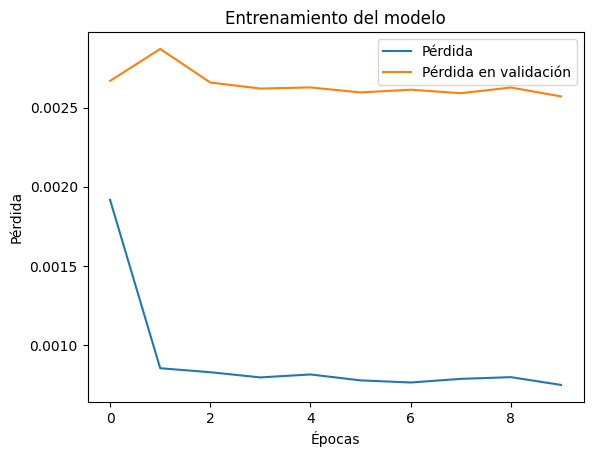

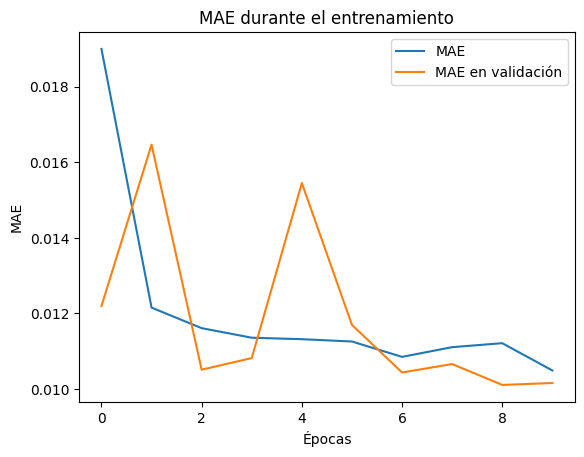

In [46]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Pérdida')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.title('Entrenamiento del modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.plot(history.history['mae'], label='MAE')
plt.plot(history.history['val_mae'], label='MAE en validación')
plt.title('MAE durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()
plt.show()

Fragmento comentado para rescatar el escalado inverso.

In [47]:
"""
import pandas
filtered_data = pandas.read_csv("filtered_data.csv", sep=';')
filtered_data[['currency', 'price']] = filtered_data['price'].str.extract(r'([€$])?([\d,\.]+)')
filtered_data['price'] = filtered_data['price'].str.replace(',', '').astype(float)

from sklearn.model_selection import train_test_split

train_df, temp_df = train_test_split(filtered_data, test_size=0.30, random_state=420)

val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=420)

print("Datos tabulares - Tamaño de entrenamiento:", len(train_df))
print("Datos tabulares - Tamaño de validación:", len(val_df))
print("Datos tabulares - Tamaño de prueba:", len(test_df))
train_df.reset_index(drop=True, inplace=True)
train_df.index
variables_interes = ['price', 'property_type', 'room_type', 'availability_365', 'accommodates', 'beds', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'host_total_listings_count']
train_df = train_df[variables_interes]
train_df = train_df.dropna(subset=['beds'])
y_train_tab = train_df['price']

from sklearn.preprocessing import MinMaxScaler

scaler_y = MinMaxScaler()

y_train_tab = scaler_y.fit_transform(y_train_tab.values.reshape(-1, 1))
"""


Datos tabulares - Tamaño de entrenamiento: 4382
Datos tabulares - Tamaño de validación: 939
Datos tabulares - Tamaño de prueba: 940


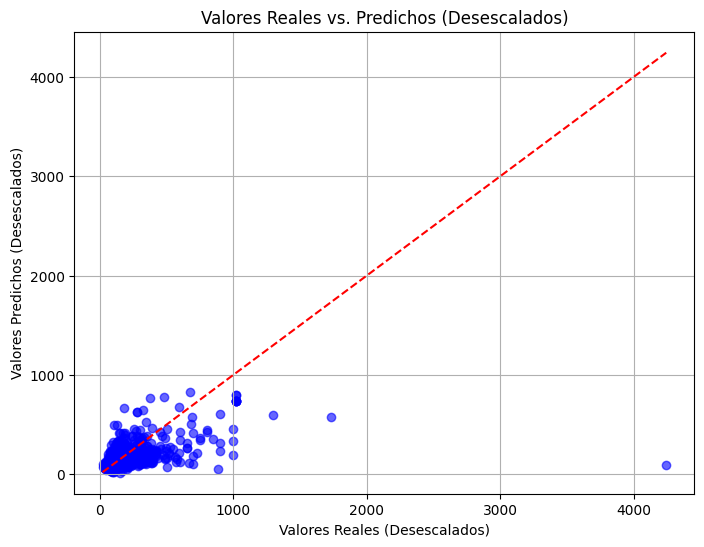

In [48]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

y_pred_scaled = y_pred
y_pred_rescaled = scaler_y.inverse_transform(y_pred_scaled)
y_test_rescaled = scaler_y.inverse_transform(y_test_tab)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_rescaled, y_pred_rescaled, alpha=0.6, color='b')
plt.plot([min(y_test_rescaled), max(y_test_rescaled)], [min(y_test_rescaled), max(y_test_rescaled)], color='r', linestyle='--')  # Línea de referencia
plt.title('Valores Reales vs. Predichos (Desescalados)')
plt.xlabel('Valores Reales (Desescalados)')
plt.ylabel('Valores Predichos (Desescalados)')
plt.grid(True)
plt.show()

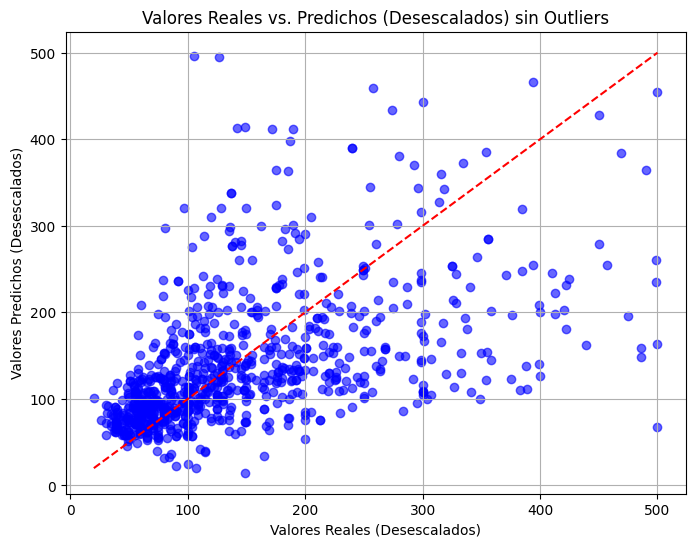

In [49]:
threshold = numpy.percentile(y_test_rescaled, 95)

mask = (y_test_rescaled <= threshold) & (y_pred_rescaled <= threshold)

y_test_rescaled_filtered = y_test_rescaled[mask]
y_pred_rescaled_filtered = y_pred_rescaled[mask]

plt.figure(figsize=(8, 6))
plt.scatter(y_test_rescaled_filtered, y_pred_rescaled_filtered, alpha=0.6, color='b')
plt.plot([min(y_test_rescaled_filtered), max(y_test_rescaled_filtered)],
         [min(y_test_rescaled_filtered), max(y_test_rescaled_filtered)],
         color='r', linestyle='--')  # Línea de referencia
plt.title('Valores Reales vs. Predichos (Desescalados) sin Outliers')
plt.xlabel('Valores Reales (Desescalados)')
plt.ylabel('Valores Predichos (Desescalados)')
plt.grid(True)
plt.show()

Observamos que quitando la muestra atípica (vemos el 95% de los datos) el modelo calculado con una estrategia early-fusion mejora con respecto a la estrategia late-fusion.
Además el gráfico superior muestra una distribución muy similar a la que tiene el modelo 1D por lo que podemos asumir que este tiene un peso mayor en la estimación del precio.
Sin embargo, fusionar un modelo tabular donde se muestran las características reales dentro del portal de airbnb, con el modelo de imágenes donde se extrae en base a las imágenes si el precio es mayor o menor (que la mediana) aporta mucho más valor.